In [1]:
from preprocess_data import processed_data, preprocessed_data_sample
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
running_folder = 'Data/running'

                 ax        ay        az         a
time                                             
0.000000  -0.388500  0.590000  0.248000  0.749000
0.079134  -0.359134  0.428335  0.932000  1.087134
0.158268  -0.162268  0.462416  0.998196  1.112172
0.237402  -0.227605  0.394807  1.079595  1.171598
0.316536  -0.015144  0.394680  0.933016  1.013856
...             ...       ...       ...       ...
78.817464 -0.141856  0.579268  0.699392  0.919392
78.896598 -0.160794  0.585663  0.765598  0.977196
78.975732 -0.169366  0.591366  0.725196  0.951830
79.054866 -0.196553  0.608519  0.486427  0.804062
79.134000 -0.084000  0.523000  0.375000  0.649000

[1001 rows x 4 columns]
                 ax        ay        az         a
time                                             
0.000000  -0.677000  0.293000  0.841000  1.118000
0.067058  -0.329161  0.266910  1.078897  1.158929
0.134116  -0.468336  0.350411  0.691253  0.905568
0.201174  -0.348566  0.336413  0.921413  1.040935
0.268232  -0.479995  0.38

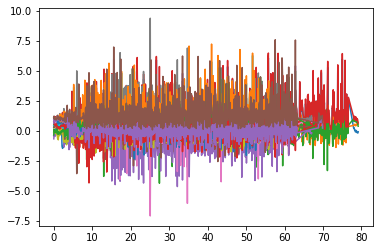

In [3]:
datasets = preprocessed_data_sample(running_folder)
running_df = datasets.sampling_n(1000)
for df in running_df:
    print(df)
    plt.plot(df)

plt.show()
    

In [39]:
# do not run if it is non necessary (very long)
walking_folder = 'Data/walking_right_hand'
p = processed_data(walking_folder)
p.reading()
p.suppliment()
p.write_files()

walking_right_hand.csv
walking_right_hand_4.csv
walking_right_hand_2.csv
walking_right_hand_3.csv


                ax        ay        az         a
time                                            
0.00000  -0.097000  0.613000  0.686000  0.925000
0.04032  -0.156680  0.643020  0.899780  1.116780
0.08064  -0.107080  0.551080  0.883920  1.047240
0.12096   0.025960  0.630053  0.881013  1.084040
0.16128  -0.005000  0.654293  0.676053  0.941187
...            ...       ...       ...       ...
40.15872 -0.012200  0.511840  0.856960  0.997520
40.19904 -0.008160  0.542160  0.982587  1.121733
40.23936 -0.063184  0.496216  0.576664  0.768168
40.27968 -0.008500  0.540640  1.045520  1.177860
40.32000 -0.040000  0.505000  0.599000  0.785000

[1001 rows x 4 columns]
                 ax        ay        az         a
time                                             
0.000000  -0.392000  0.754500  0.378500  0.930500
0.055968  -0.366452  0.756452  0.791484  1.154936
0.111936  -0.464845  0.843212  0.545882  1.106855
0.167904  -0.354307  0.774160  0.651939  1.072501
0.223872  -0.451692  0.689308  0.51531

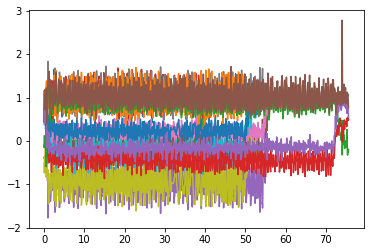

In [40]:
walking_datasets = preprocessed_data_sample(walking_folder)
walking_df = walking_datasets.sampling_n(1000)
for df in walking_df:
    print(df)
    plt.plot(df)

plt.show()

In [10]:
import statsmodels.api as sm

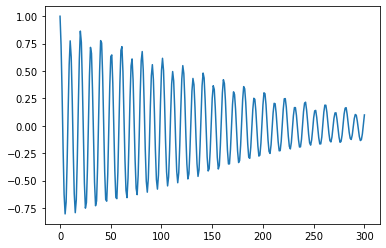

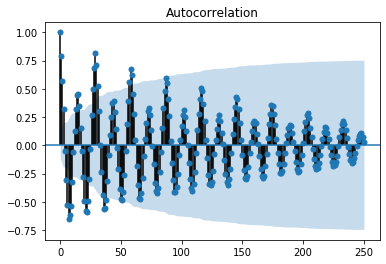

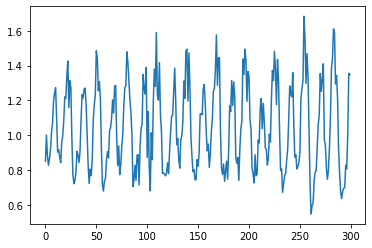

In [68]:
acf=sm.tsa.stattools.acf(walking_df[1]['a'],nlags = 300)
plt.plot(acf)
plt.show()
sm.graphics.tsa.plot_acf(list(walking_df[0]['a'])[200:500],lags = 250)
#sm.graphics.tsa.plot_pacf(list(walking_df[0]['a'])[200:500],lags = 250)
plt.savefig("walking_autocorrelation.svg")
plt.show()
plt.plot(list(walking_df[0]['a'])[200:500])
plt.show()

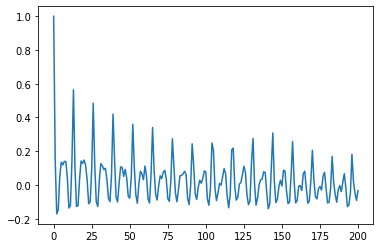

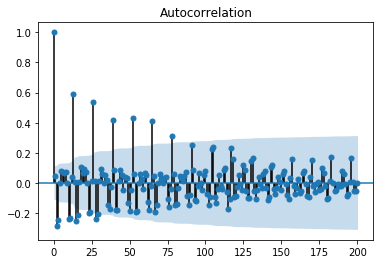

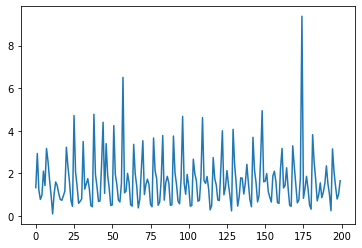

In [69]:
acf=sm.tsa.stattools.acf(running_df[1]['a'],nlags = 200)
plt.plot(acf)
plt.show()
sm.graphics.tsa.plot_acf(list(running_df[1]['a'])[200:500],lags = 200)
plt.savefig("running_autocorrelation.svg")
plt.show()
plt.plot(list(running_df[1]['a'])[200:400])
plt.show()

In [53]:
series = list(walking_df[0]['a'])[200:500]
model = sm.tsa.ARIMA(series, order=(15,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  299
Model:                ARIMA(15, 1, 0)   Log Likelihood                 228.996
Method:                       css-mle   S.D. of innovations              0.112
Date:                Tue, 25 Feb 2020   AIC                           -423.993
Time:                        15:12:36   BIC                           -361.085
Sample:                             1   HQIC                          -398.814
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.384e-06      0.003      0.002      0.998      -0.005       0.005
ar.L1.D.y     -0.1414      0.057     -2.500      0.013      -0.252      -0.031
ar.L2.D.y     -0.1583      0.058     -2.752      0.0

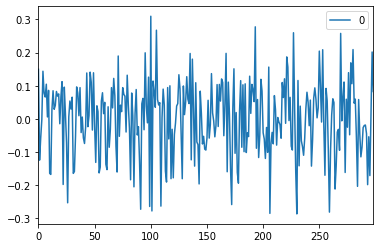

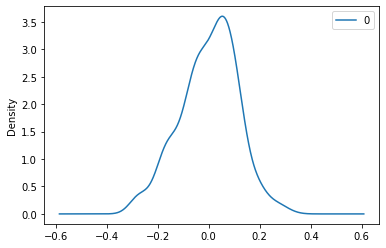

                0
count  299.000000
mean     0.000691
std      0.112412
min     -0.287121
25%     -0.068208
50%      0.015522
75%      0.079376
max      0.309540


In [54]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=1.040383, expected=1.081285
predicted=1.069007, expected=1.192220
predicted=1.260616, expected=1.361540
predicted=1.387396, expected=1.607280
predicted=1.649371, expected=1.652000
predicted=1.690634, expected=1.322160
predicted=1.297640, expected=1.371608
predicted=1.266607, expected=1.430440
predicted=1.295516, expected=1.022616
predicted=1.098518, expected=0.779000
predicted=0.760240, expected=0.703800
predicted=0.518188, expected=0.627920
predicted=0.655851, expected=0.641515
predicted=0.735023, expected=0.755760
predicted=0.797402, expected=0.757667
predicted=0.802454, expected=0.765430
predicted=0.807453, expected=0.895669
predicted=0.875929, expected=1.085320
predicted=1.108713, expected=1.176053
predicted=1.241597, expected=1.460100
predicted=1.525796, expected=1.254520
predicted=1.205692, expected=1.304800
predicted=1.338305, expected=1.286240
predicted=1.123604, expected=0.932160
predicted=0.936778, expected=0.750900
predicted=0.702413, expected=1.040960
predicted=0.

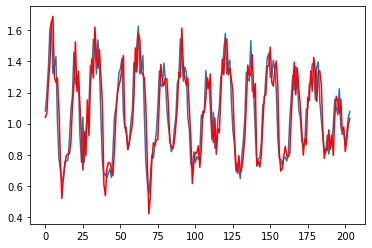

In [70]:
from sklearn.metrics import mean_squared_error

X = list(walking_df[0]['a'])[200:800]
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.savefig("arima_walking.svg")
plt.show()

predicted=0.788432, expected=0.093179
predicted=0.832359, expected=0.499455
predicted=1.511028, expected=1.742908
predicted=1.922655, expected=2.222772
predicted=1.467496, expected=1.799400
predicted=0.912641, expected=1.334314
predicted=0.317416, expected=0.168985
predicted=1.098500, expected=2.129176
predicted=1.565881, expected=1.753931
predicted=1.394045, expected=1.320527
predicted=1.199908, expected=1.239140
predicted=1.293861, expected=1.125558
predicted=1.154900, expected=1.068616
predicted=0.625296, expected=0.385760
predicted=0.852012, expected=0.613280
predicted=1.627852, expected=2.223373
predicted=2.053354, expected=1.780709
predicted=1.462232, expected=2.170675
predicted=1.081205, expected=1.274476
predicted=0.437207, expected=0.202187
predicted=1.591702, expected=1.208880
predicted=1.638005, expected=1.638424
predicted=1.452902, expected=1.811074
predicted=1.376038, expected=1.546333
predicted=1.288636, expected=1.129460
predicted=1.122613, expected=0.515723
predicted=0.

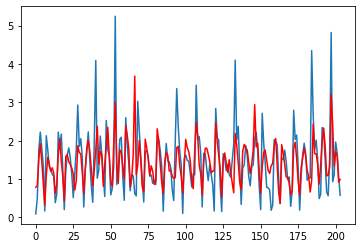

In [71]:
from sklearn.metrics import mean_squared_error

X = list(running_df[1]['a'])[200:800]
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.ARIMA(history, order=(12,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.savefig("arima_running.svg")
plt.show()

In [79]:
X = list(running_df[1].index.values)
size = int(len(X) * 0.66)
print(X[size:len(X)])

[44.25827999997073, 44.325337999970685, 44.39239599997064, 44.45945399997059, 44.526511999970545, 44.5935699999705, 44.66062799997045, 44.727685999970404, 44.79474399997036, 44.86180199997031, 44.928859999970264, 44.99591799997022, 45.06297599997017, 45.130033999970124, 45.19709199997008, 45.26414999997003, 45.33120799996998, 45.39826599996994, 45.46532399996989, 45.53238199996984, 45.599439999969796, 45.66649799996975, 45.7335559999697, 45.800613999969656, 45.86767199996961, 45.93472999996956, 46.001787999969515, 46.06884599996947, 46.13590399996942, 46.202961999969375, 46.27001999996933, 46.33707799996928, 46.404135999969235, 46.47119399996919, 46.53825199996914, 46.605309999969094, 46.67236799996905, 46.739425999969, 46.806483999968954, 46.87354199996891, 46.94059999996886, 47.007657999968814, 47.07471599996877, 47.14177399996872, 47.20883199996867, 47.275889999968626, 47.34294799996858, 47.41000599996853, 47.477063999968486, 47.54412199996844, 47.61117999996839, 47.678237999968346,

In [80]:
X = list(walking_df[1].index.values)
size = int(len(X) * 0.66)
print(X[size:len(X)])

[36.938879999973786, 36.99484799997374, 37.0508159999737, 37.10678399997366, 37.162751999973615, 37.21871999997357, 37.27468799997353, 37.33065599997349, 37.386623999973445, 37.4425919999734, 37.49855999997336, 37.55452799997332, 37.610495999973274, 37.66646399997323, 37.72243199997319, 37.778399999973146, 37.834367999973104, 37.89033599997306, 37.94630399997302, 38.002271999972976, 38.05823999997293, 38.11420799997289, 38.17017599997285, 38.226143999972805, 38.28211199997276, 38.33807999997272, 38.39404799997268, 38.450015999972635, 38.50598399997259, 38.56195199997255, 38.61791999997251, 38.673887999972465, 38.72985599997242, 38.78582399997238, 38.84179199997234, 38.897759999972294, 38.95372799997225, 39.00969599997221, 39.065663999972166, 39.121631999972124, 39.17759999997208, 39.23356799997204, 39.289535999971996, 39.34550399997195, 39.40147199997191, 39.45743999997187, 39.513407999971825, 39.56937599997178, 39.62534399997174, 39.6813119999717, 39.737279999971655, 39.79324799997161